# ***Importing Dependencies***

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.svm import SVC                             # Support Vector Machine Algorithm
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier      # K-Nearest Classifier
from sklearn.naive_bayes import GaussianNB              # Naives Bayes Classifier
from sklearn.tree import DecisionTreeClassifier         # Decision Tree Classifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("tweet.csv") # Loading of Dataset Comma Separated File with Pandas library

In [4]:
print(f"The Dataset columns:-->{df.columns}") # DataSet have two Coloumns Tweets and class
print(f"The DataSet with rows and Coloumns:-->{df.shape}") # The DataSet have 81408 no.of rows and 2 Coloumns
print(f"DataSet Coloumn data type:-->{df.dtypes}") # DataSet Coloumn data type is defined 

The Dataset columns:-->Index(['tweets', 'class'], dtype='object')
The DataSet with rows and Coloumns:-->(81408, 2)
DataSet Coloumn data type:-->tweets    object
class     object
dtype: object


In [5]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,tweets,class
count,81408,81408
unique,67997,4
top,$$$=&gt;&gt; #peace #love #freedom\n#fight for...,figurative
freq,14,21238


In [ ]:
# Checking for duplicate data
df.duplicated().sum()

49

In [6]:
# Duplicate data
df[df.duplicated()].head()

,tweets,class
12617,#Irony,figurative
17820,#irony,figurative
21104,#sarcasm,figurative
31250,#ironic,irony
35871,#Irony,irony


In [ ]:
# Removing duplicaates
df=df.drop_duplicates()
df = df.reset_index(drop=True)


In [ ]:
# The total number of classes
df['class'].nunique()

4

In [ ]:
# The unique class characteristics
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [ ]:
# The value counts of each class
df['class'].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

- The frequency of occurencies of class characteristics are not much deviated, from this we can say that the given dataset is balanced data

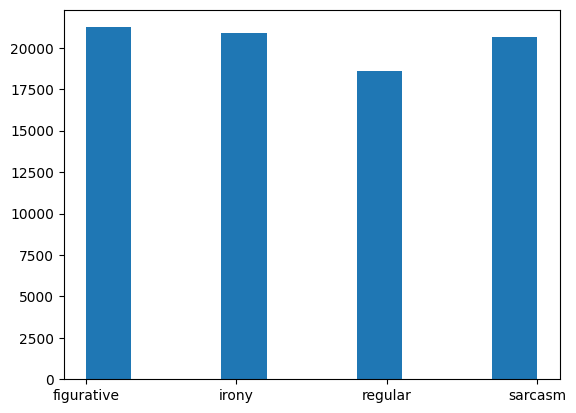

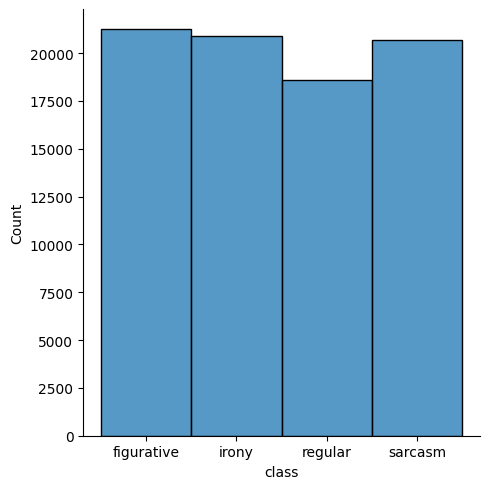

In [7]:
plt.hist(df['class'])
sns.displot(df['class'])

### Key Insights:
- The data is balanced, the class counts are close to each other
- Regular is less common compare to others
- Figuratve, Irony & Sarcasm are close to each other

# ***Text Preprocessing***

## _Removing URL, Special Characters, Lowering text, Punctuation_

In [8]:
# Removing URL, Special Characters, Lowering text, Punctuation, Stopwords remove
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers,
    Removing URL's, hashtags, mentions, and special characters.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\@\w+|\#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text

clean = lambda x: clean_text(x)

In [9]:
df=pd.read_csv("tweet.csv")
df['tweets']=df.tweets.apply(clean)
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

## _Remove Stopwords_

In [10]:
# Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweets']

0        aware dirty step get money staylight staywhite...
1             sarcasm people dont understand diy artattack
2        iminworkjeremy medsingle dailymail readers sen...
3                      wilw get feeling like games sarcasm
4        teacherarthurg rweingarten probably missed tex...
                               ...                        
81403    photo image via heart childhood cool funny sar...
81404    never knewi better put universe lolmaybe there...
81405    hey wanted say thanks puberty letting apart it...
81406    im sure coverage like fox news special hidden ...
81407                           wont believe see p sarcasm
Name: tweets, Length: 81408, dtype: object

## *Lemmatization*

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Function to apply Porter stemming to a single word
def apply_lemmatization(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

# Apply lemmatization to the 'text' column of the DataFrame
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([apply_lemmatization(word) for word in word_tokenize(x)]))


In [12]:
#Word frequency of top 20 words
freq = pd.Series(' '.join(df['tweets']).split()).value_counts()[:20] 
freq

sarcasm      30006
irony        24149
ironic        8238
im            3497
news          3444
love          3434
like          3403
people        3316
get           3195
amp           3169
peace         3087
late          2997
day           2988
drug          2938
humor         2927
education     2874
one           2764
politics      2736
dont          2719
u             2637
Name: count, dtype: int64

In [14]:
tweets = " ".join(df['tweets'])
type(tweets)

str

## ***Wordcloud Visalization of tweets***

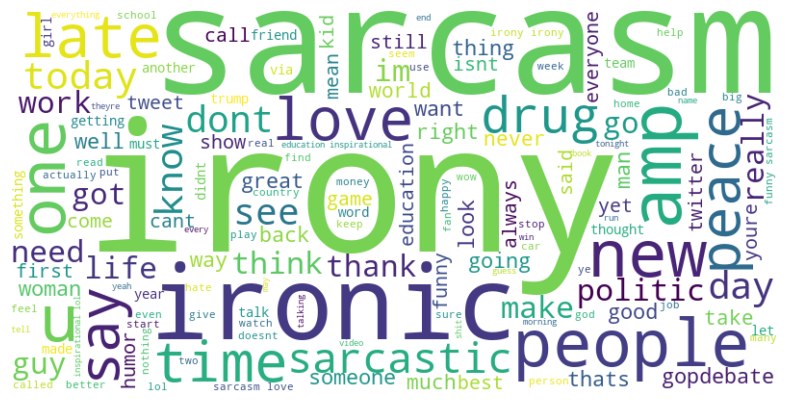

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## ***Figurative Wordcloud Visulization***

sarcasm    10214
irony       7980
ironic      2904
im          1075
like         996
people       989
get          953
love         864
day          836
dont         816
Name: count, dtype: int64


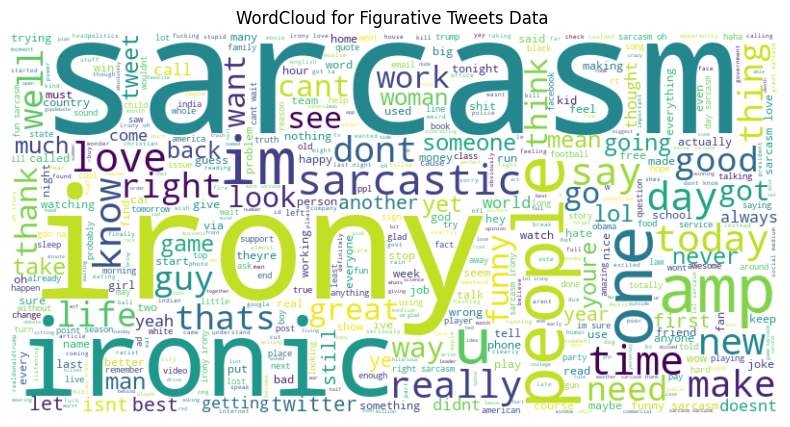

In [27]:
# Separating Figurative classified data
tweets_figurative=df[df['class']=='figurative']
figurative=" ".join(tweets_figurative['tweets'])
#Word frequency of top 10 words 
freq_figurative = pd.Series(' '.join(tweets_figurative['tweets']).split()).value_counts()[:10]
print(freq_figurative)
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate(figurative)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Figurative Tweets Data ')
plt.show()

## ***Irony Wordcloud Visualization***

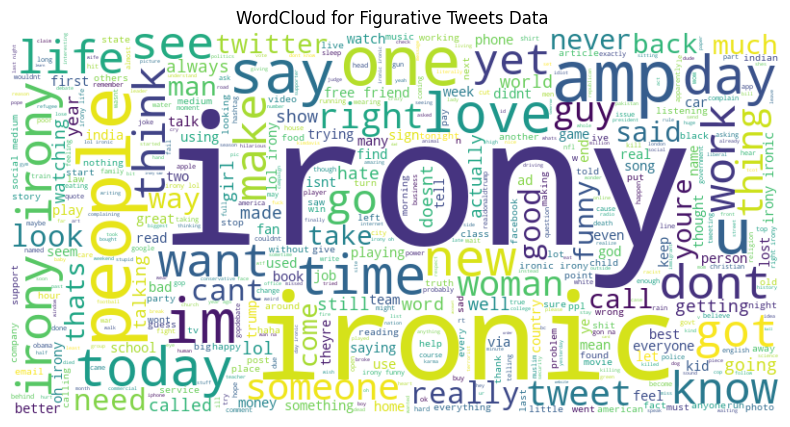

In [25]:
# Separating Irony classified data
tweets_irony=df[df['class']=='irony']
irony=" ".join(tweets_irony['tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate(irony)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Figurative Tweets Data ')
plt.show()

## ***Regular Wordcloud Visualization***

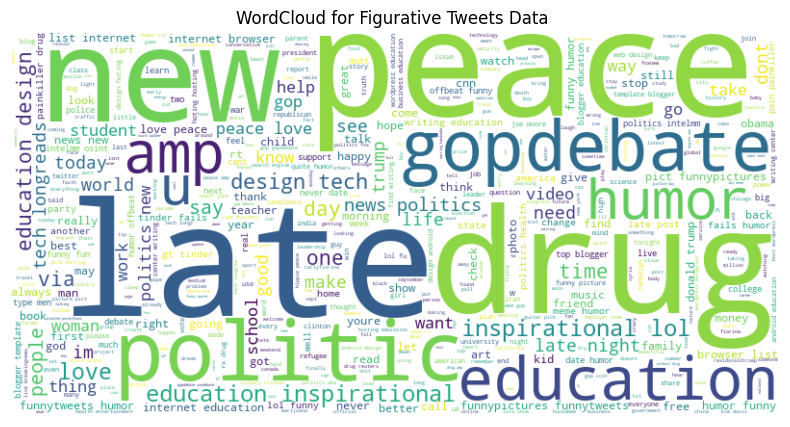

In [28]:
# Separating Regular classified data
tweets_regular=df[df['class']=='regular']
regular=" ".join(tweets_regular['tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate(regular)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Figurative Tweets Data ')
plt.show()

## ***Sarcasm Wordcloud Visualization***

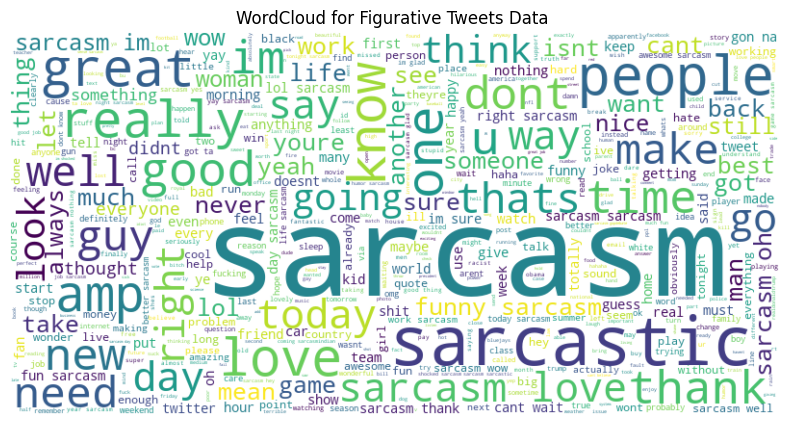

In [29]:
# Separating Sarcasm classified data
tweets_sarcasm=df[df['class']=='sarcasm']
sarcasm=" ".join(tweets_sarcasm['tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate(sarcasm)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Figurative Tweets Data ')
plt.show()

# ***Bi-gram Visualiazation***

In [30]:
#Function for Bi-grams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n2_words_bigram(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [31]:
# Bi-gram for tweets dataset 
tweets_words_bi = get_top_n2_words_bigram(df['tweets'], n=200) #top 200
tweets_df_bi = pd.DataFrame(tweets_words_bi)
tweets_df_bi.columns=["Bi-gram", "Freq"]
tweets_df_bi.head()

,Bi-gram,Freq
0,funny sarcasm,513
1,education inspirational,432
2,inspirational lol,430
3,design tech,387
4,gon na,369


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\319067284.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = tweets_df_bi["Bi-gram"][0:20])


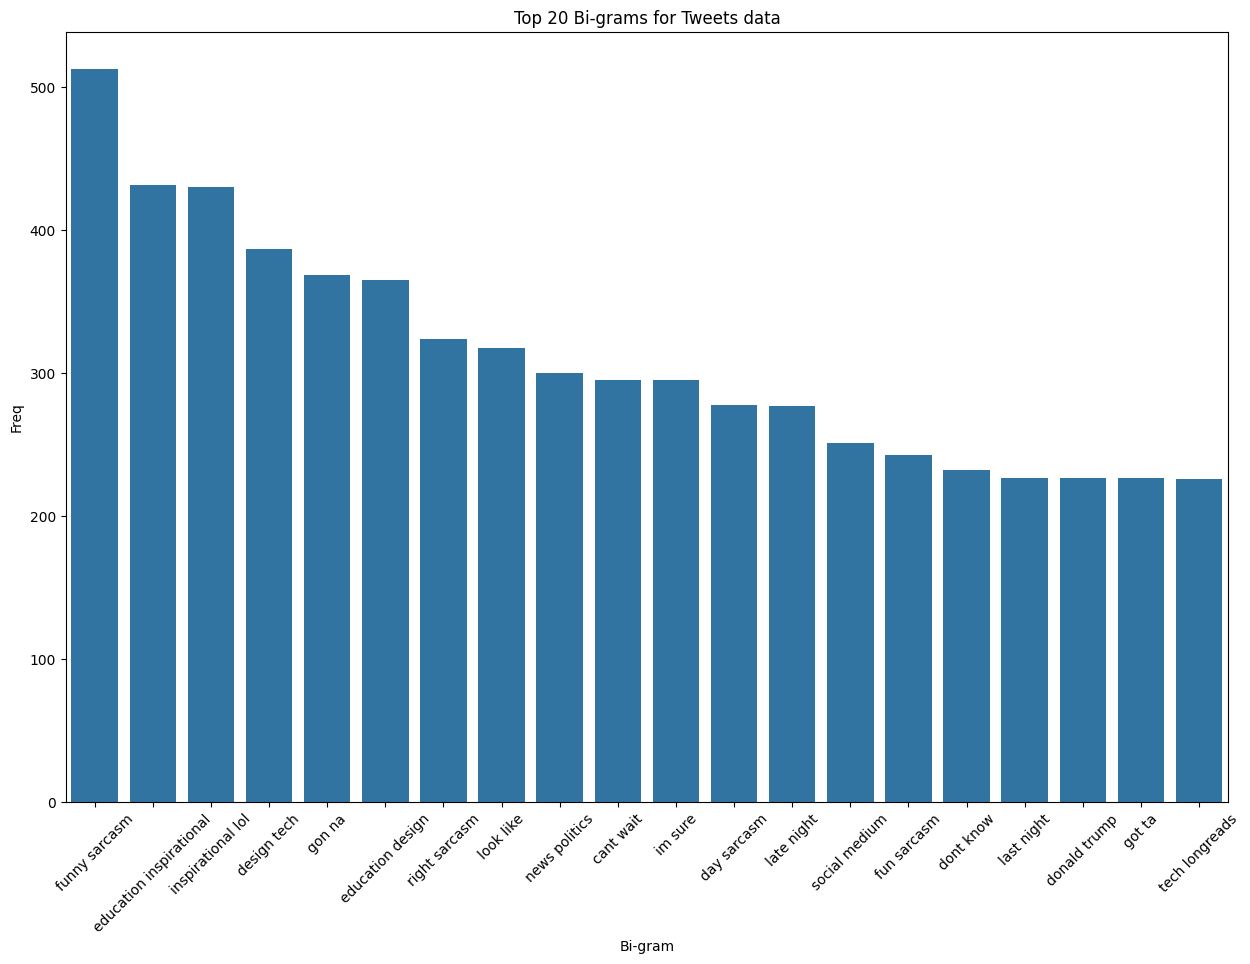

In [32]:
# Top 20 Bi-gram Bar chart for Tweets Data
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=tweets_df_bi['Bi-gram'][0:20],y=tweets_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = tweets_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams for Tweets data')
plt.show()

# ***Tri-Gram Visualiazation***

In [33]:
# Trigram
def get_top_n2_words_trigram(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [34]:
# Tri-gram for tweets dataset
tweets_words_tri = get_top_n2_words_trigram(df['tweets'], n=200) #top 200
tweets_df_tri = pd.DataFrame(tweets_words_tri)
tweets_df_tri.columns=["Tri-gram", "Freq"]
tweets_df_tri.head()

,Tri-gram,Freq
0,education inspirational lol,430
1,education design tech,363
2,design tech longreads,226
3,funnypictures funnytweets humor,179
4,pict funnypictures funnytweets,158


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\2508757499.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = tweets_df_tri["Tri-gram"][0:20])


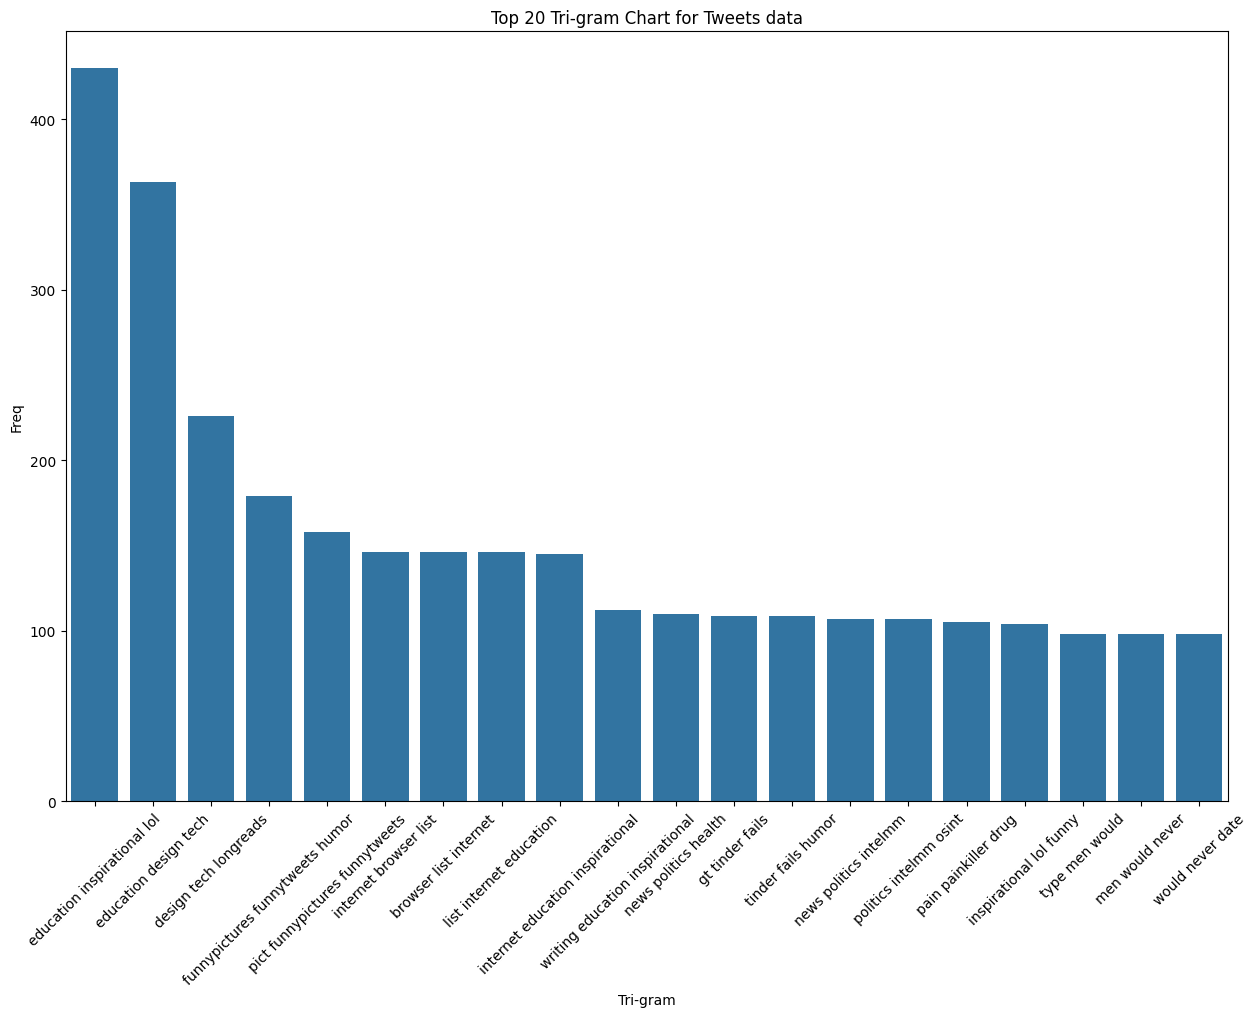

In [36]:
# Top 20 Tri-gram Bar chart for Tweets Data
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=tweets_df_tri['Tri-gram'][0:20],y=tweets_df_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = tweets_df_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram Chart for Tweets data')
plt.show()

In [43]:
# Top 200 Bi-grams for Figurative Tweets data 
fig_words_bi = get_top_n2_words_bigram(tweets_figurative['tweets'], n=200) #top 200
fig_df_bi = pd.DataFrame(fig_words_bi)
fig_df_bi.columns=["Bi-gram", "Freq"]
fig_df_bi.head()

,Bi-gram,Freq
0,funny sarcasm,195
1,right sarcasm,121
2,gon na,107
3,day sarcasm,103
4,look like,98


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\2927301626.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = fig_df_bi["Bi-gram"][0:20])


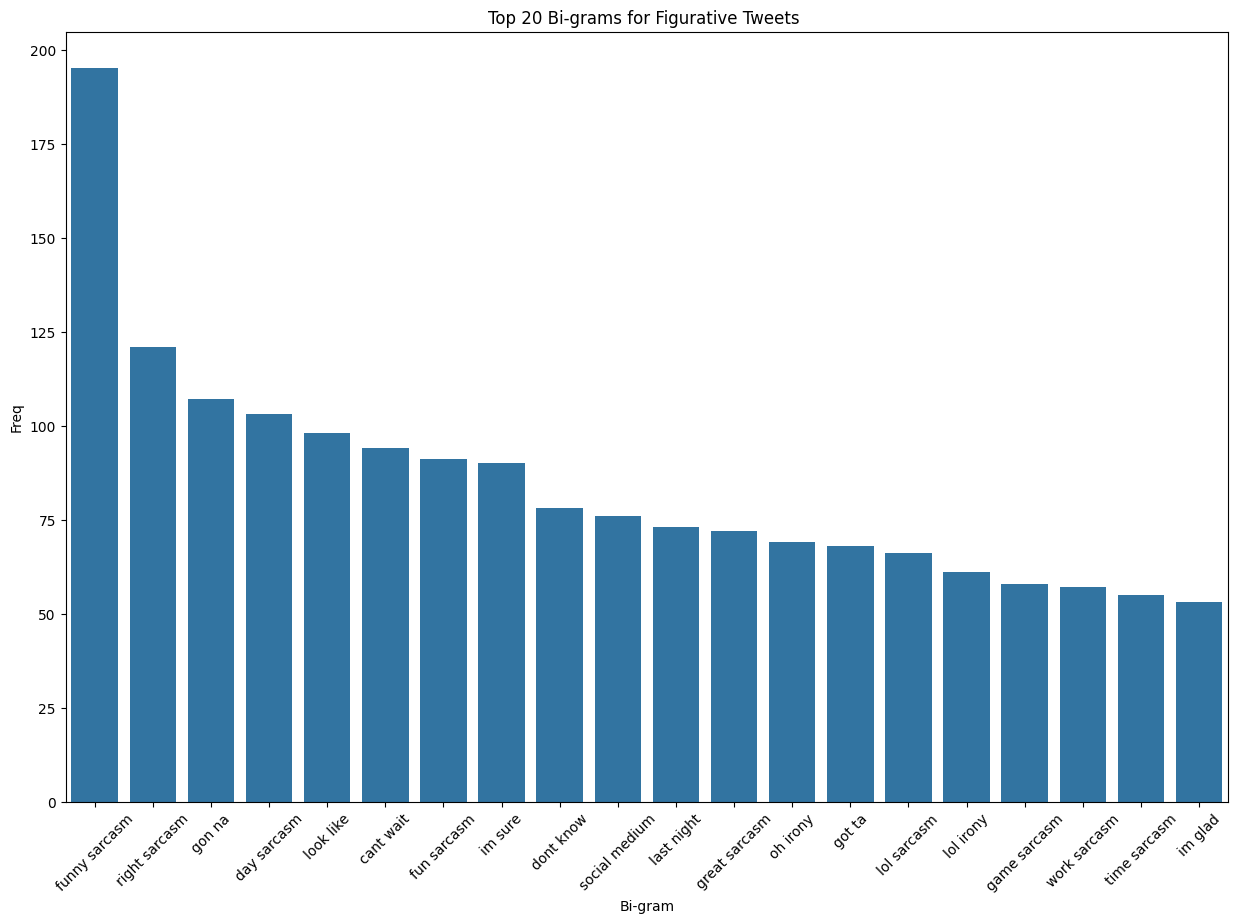

In [44]:
# Bi-gram Bar chart for Figurative tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=fig_df_bi['Bi-gram'][0:20],y=fig_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = fig_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams for Figurative Tweets ')
plt.show()

In [45]:
# Tri-gram for tweets dataset
fig_tri = get_top_n2_words_trigram(tweets_figurative['tweets'], n=200) #top 200
fig_tri = pd.DataFrame(fig_tri)
fig_tri.columns=["Tri-gram", "Freq"]
fig_tri.head()

,Tri-gram,Freq
0,got ta love,29
1,much fun sarcasm,21
2,im gon na,20
3,cant wait see,17
4,good job sarcasm,15


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\1502133522.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = fig_tri["Tri-gram"][0:20])


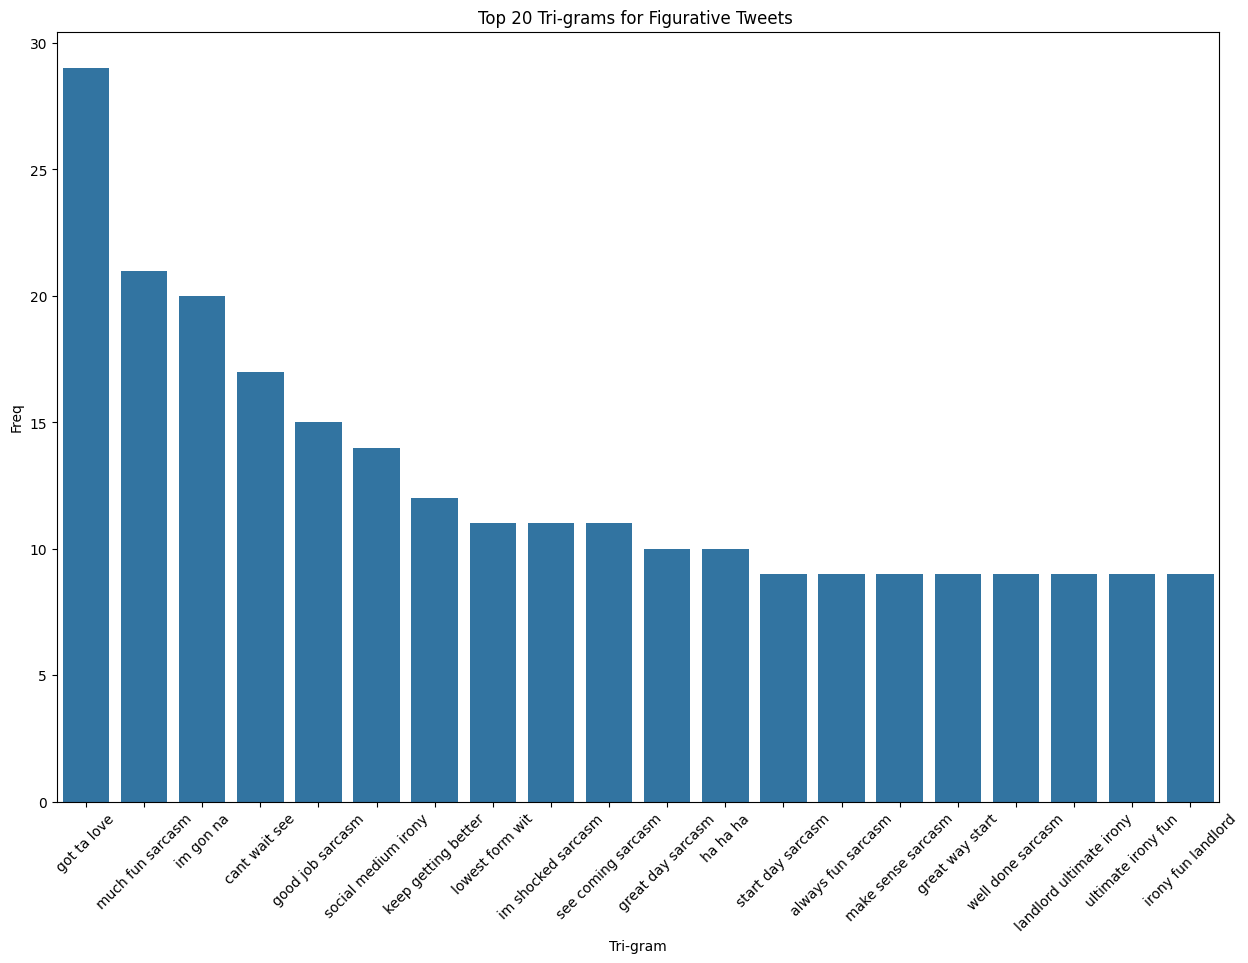

In [46]:
# Tri-gram bar chart for Figurative tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=fig_tri['Tri-gram'][0:20],y=fig_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = fig_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-grams for Figurative Tweets ')
plt.show()

In [47]:
# Top 200 Bi-grams for Irony Tweets data 
irony_words_bi = get_top_n2_words_bigram(tweets_irony['tweets'], n=200) #top 200
irony_df_bi = pd.DataFrame(irony_words_bi)
irony_df_bi.columns=["Bi-gram", "Freq"]
irony_df_bi.head()

,Bi-gram,Freq
0,lol irony,142
1,oh irony,140
2,social medium,110
3,day irony,108
4,look like,91


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\2922007479.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = irony_df_bi["Bi-gram"][0:20])


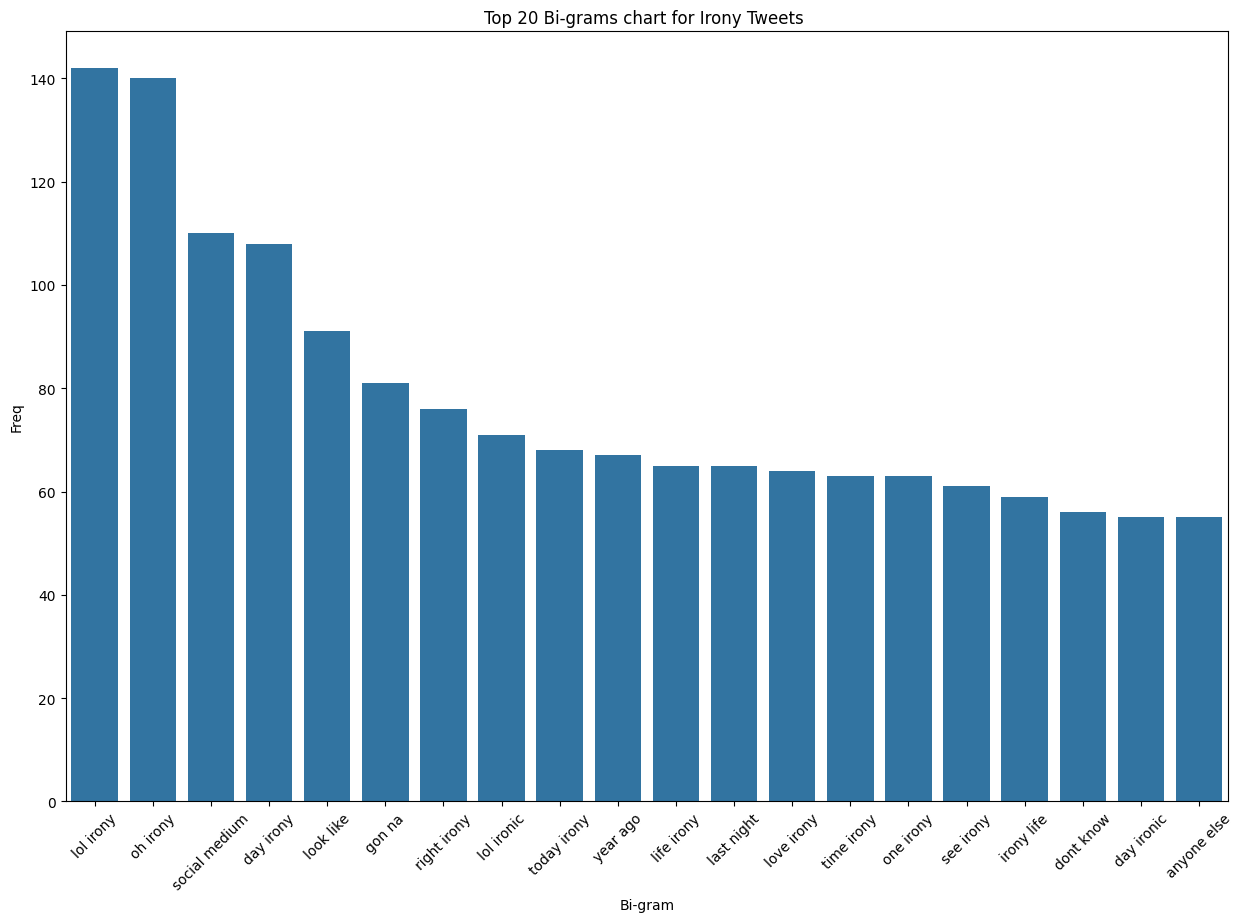

In [48]:
# Bi-gram Bar chart for Irony tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=irony_df_bi['Bi-gram'][0:20],y=irony_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = irony_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams chart for Irony Tweets ')
plt.show()

In [49]:
# Tri-gram for Irony tweets data
irony_tri = get_top_n2_words_trigram(tweets_irony['tweets'], n=200) #top 200
irony_tri = pd.DataFrame(irony_tri)
irony_tri.columns=["Tri-gram", "Freq"]
irony_tri.head()

,Tri-gram,Freq
0,giggle office ultimate,26
1,office ultimate irony,26
2,ultimate irony clickhere,26
3,irony clickhere irony,26
4,friday giggle office,22


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\3000827569.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = irony_tri["Tri-gram"][0:20])


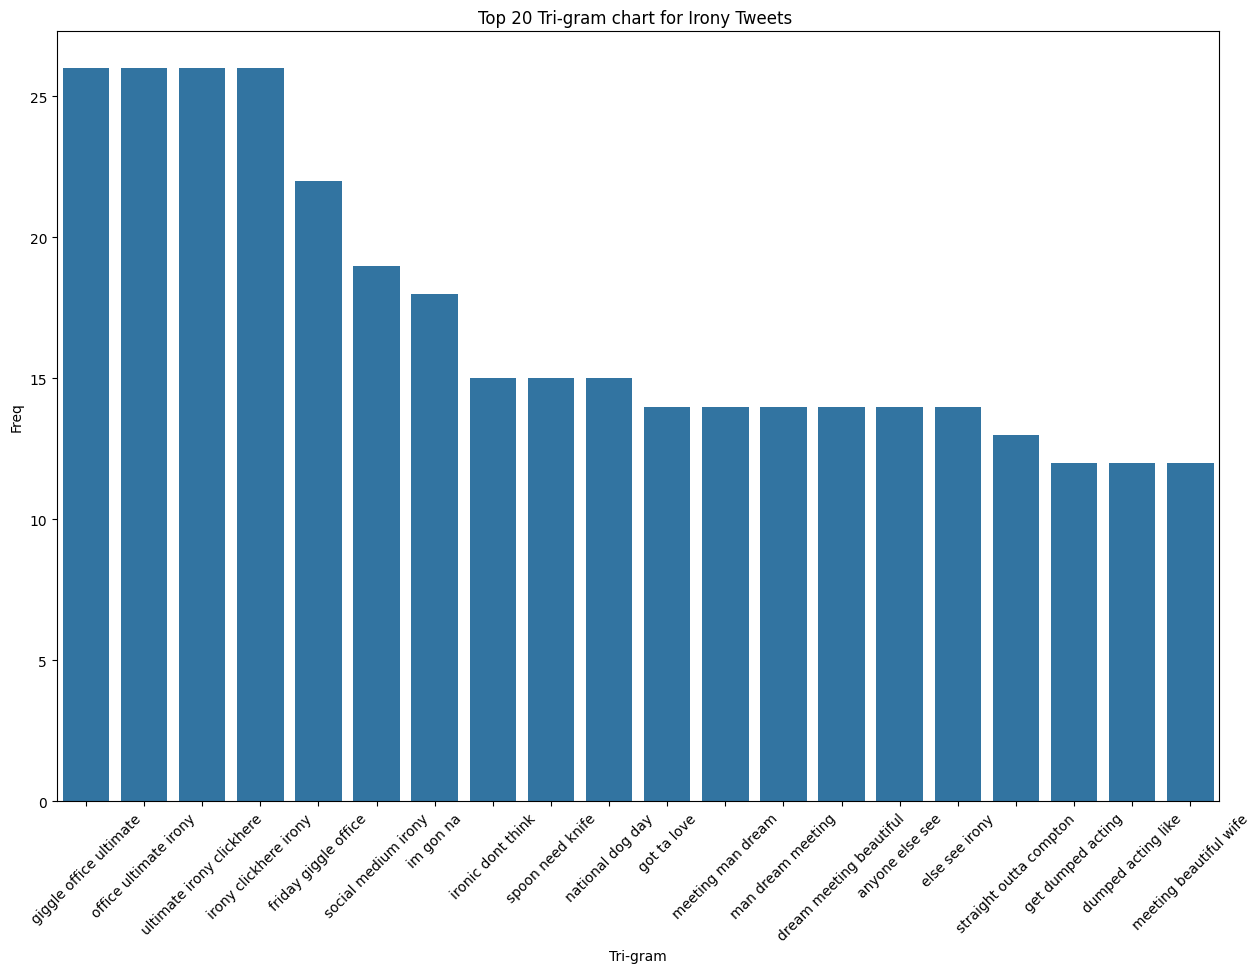

In [50]:
# Tri-gram bar chart for Irony tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=irony_tri['Tri-gram'][0:20],y=irony_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = irony_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram chart for Irony Tweets ')
plt.show()

In [51]:
# Top 200 Bi-grams for Regular Tweets data 
reg_words_bi = get_top_n2_words_bigram(tweets_regular['tweets'], n=200) #top 200
reg_df_bi = pd.DataFrame(reg_words_bi)
reg_df_bi.columns=["Bi-gram", "Freq"]
reg_df_bi.head()

,Bi-gram,Freq
0,education inspirational,432
1,inspirational lol,430
2,design tech,387
3,education design,365
4,news politics,300


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\1915339348.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = reg_df_bi["Bi-gram"][0:20])


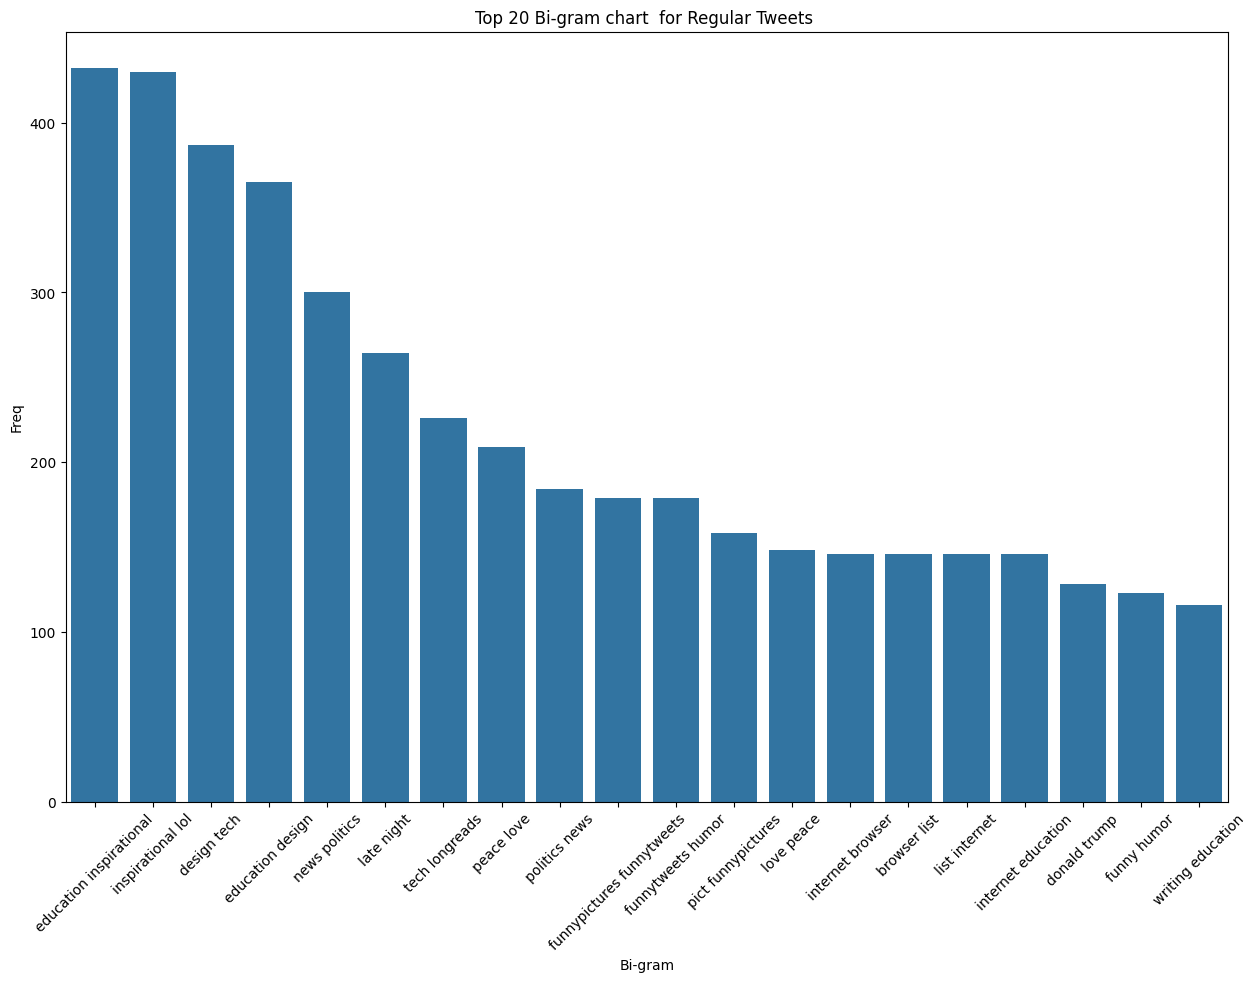

In [52]:
# Bi-gram Bar chart for Regular tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=reg_df_bi['Bi-gram'][0:20],y=reg_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = reg_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-gram chart  for Regular Tweets ')
plt.show()

In [53]:
# Tri-gram for Regular tweets 
reg_words_tri = get_top_n2_words_trigram(tweets_regular['tweets'], n=200) #top 200
reg_tri = pd.DataFrame(reg_words_tri)
reg_tri.columns=["Tri-gram", "Freq"]
reg_tri.head()

,Tri-gram,Freq
0,education inspirational lol,430
1,education design tech,363
2,design tech longreads,226
3,funnypictures funnytweets humor,179
4,pict funnypictures funnytweets,158


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\335942104.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = reg_tri["Tri-gram"][0:20])


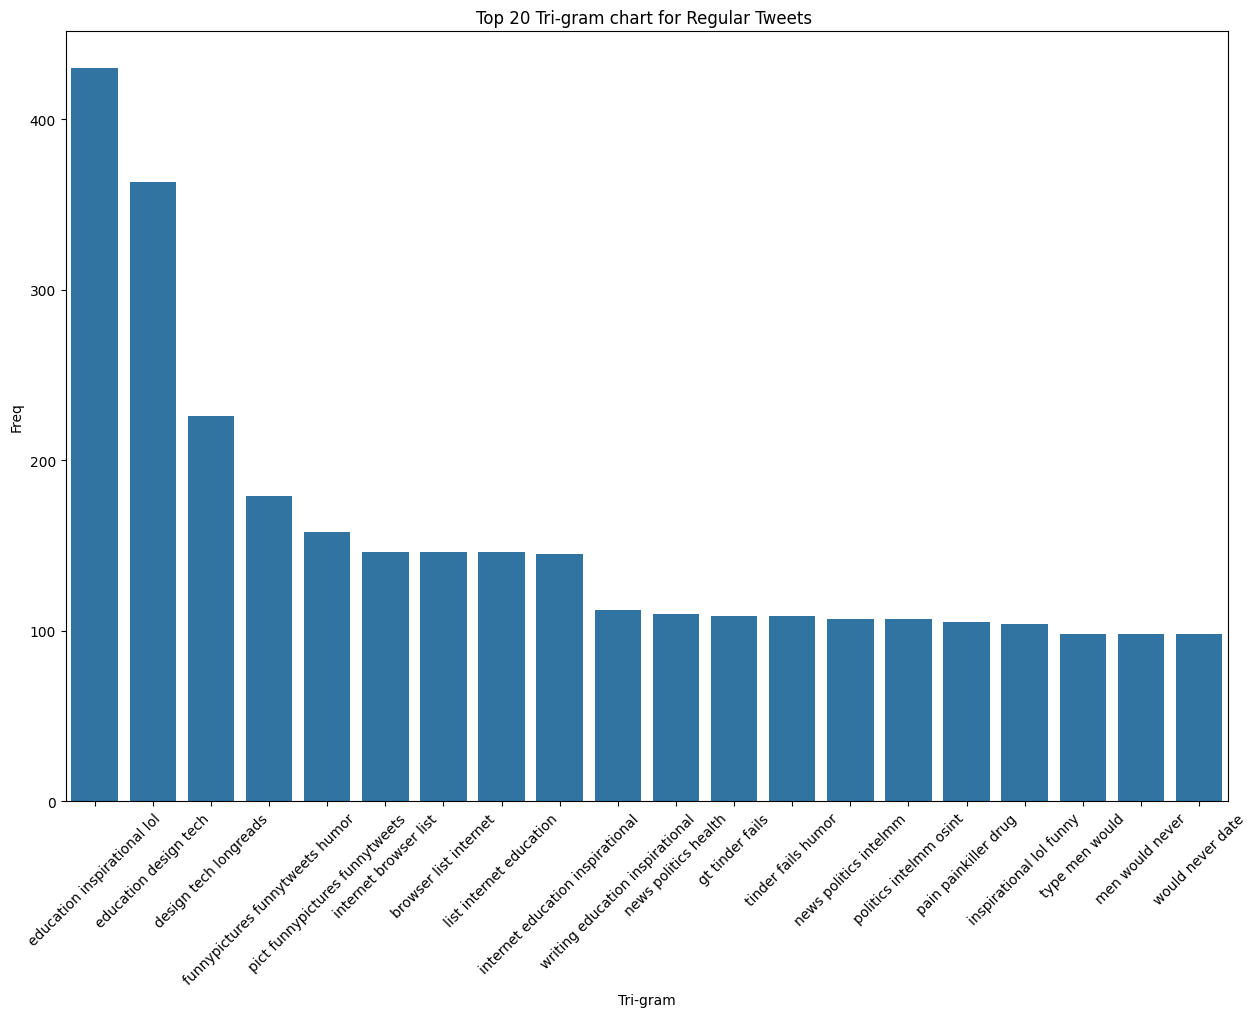

In [54]:
# Tri-gram bar chart for Regular tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=reg_tri['Tri-gram'][0:20],y=reg_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = reg_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram chart for Regular Tweets ')
plt.show()

In [55]:
# Top 200 Bi-grams for Sarcasm Tweets data 
sar_words_bi = get_top_n2_words_bigram(tweets_sarcasm['tweets'], n=200) #top 200
sar_df_bi = pd.DataFrame(sar_words_bi)
sar_df_bi.columns=["Bi-gram", "Freq"]
sar_df_bi.head()

,Bi-gram,Freq
0,funny sarcasm,318
1,right sarcasm,203
2,day sarcasm,175
3,im sure,171
4,cant wait,163


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\3718231600.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = sar_df_bi["Bi-gram"][0:20])


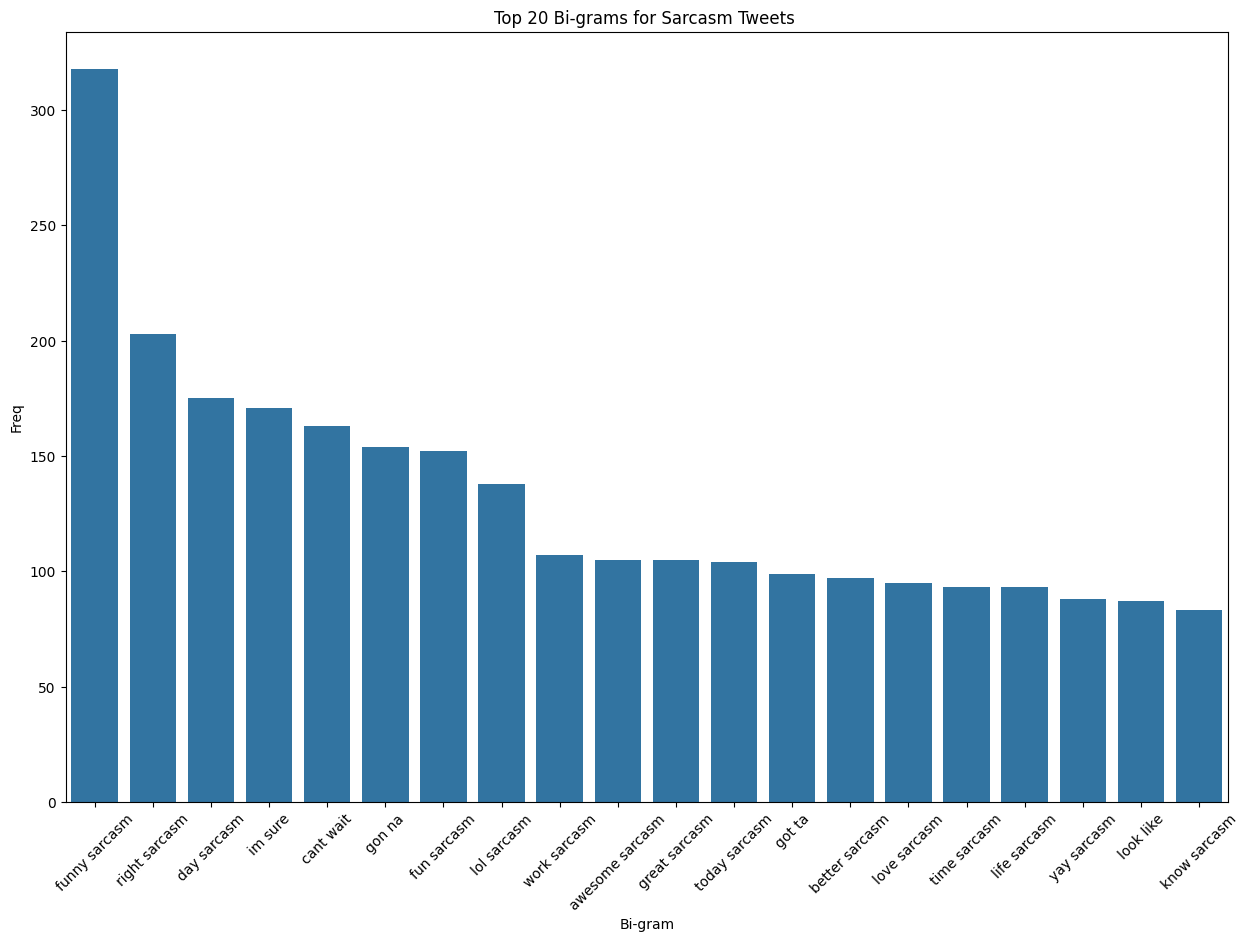

In [56]:
# Bi-gram Bar chart for Sarcasm tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=sar_df_bi['Bi-gram'][0:20],y=sar_df_bi['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = sar_df_bi["Bi-gram"][0:20])
plt.title('Top 20 Bi-grams for Sarcasm Tweets ')
plt.show()

In [57]:
# Tri-gram for Sarcasm tweets data
sar_words_tri = get_top_n2_words_trigram(tweets_sarcasm['tweets'], n=200) #top 200
sar_tri = pd.DataFrame(sar_words_tri)
sar_tri.columns=["Tri-gram", "Freq"]
sar_tri.head()

,Tri-gram,Freq
0,got ta love,51
1,see coming sarcasm,30
2,much fun sarcasm,26
3,didnt see coming,26
4,im shocked sarcasm,25


C:\Users\bhair\AppData\Local\Temp\ipykernel_9296\2471715128.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = sar_tri["Tri-gram"][0:20])


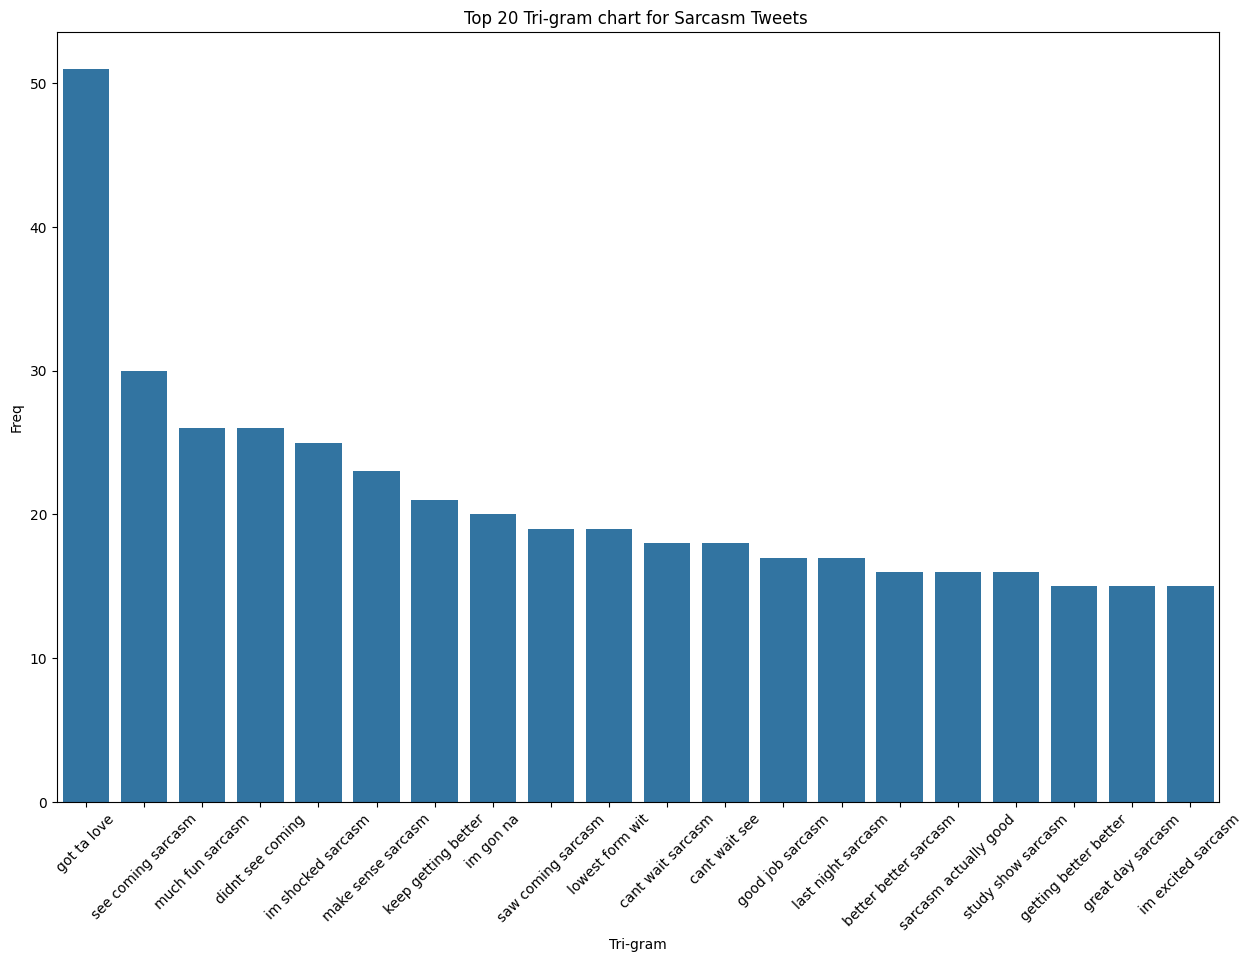

In [58]:
# Tri-gram bar chart for Sarcasm tweets
fig = plt.figure(figsize = (15, 10))

plot=sns.barplot(x=sar_tri['Tri-gram'][0:20],y=sar_tri['Freq'][0:20])
plot.set_xticklabels(rotation=45,labels = sar_tri["Tri-gram"][0:20])
plt.title('Top 20 Tri-gram chart for Sarcasm Tweets ')
plt.show()